#### Project: Implement VGG-16 Architecture for training a dog vs cat classifier

#### Packages selection
- The first things is to import all the neccesary packages needed for this project

In [6]:
import time
import os
import numpy as np
import numpy as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt

# Select GPU if available
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True

#### Settings
- Configure the device
- Define all the hyperparameters to be used and needed to be tuned to achive a better accuracy
- Load and explore the data

In [7]:
# device

DEVICE = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")

# Hyperparameters
RANDOM_SEED = 1
LEARNING_RATE = 0.001
NUM_EPOCHS =  100
BATCH_SIZE = 128

# Architecture model parameters
NUM_CLASSES = 2 # Binary classifier

In [13]:
# Dataset

num_train_cats = len(os.path.join('data', 'training', 'cat'))
num_train_dogs = len([i for i in os.listdir(os.path.join('data', 'training'))
                     if i.endswith('.jpg') and i.startswith('dog')])

print(f'Training set cats:{num_train_cats}')
print(f'Training set dogs: {num_train_dogs}')

Training set cats:17
Training set dogs: 0


(414, 500, 3)


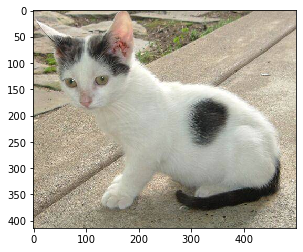

In [9]:
img = Image.open(os.path.join('data', 'training', 'cat', 'cat.3.jpg'))
print(np.asarray(img, dtype=np.uint8).shape)
plt.imshow(img)